# Aplicação de Python na Agrometeorologia

Este Jupyter Notebook é parte integrande do curso de Python ministrado durante XXII Congresso Brasiliero de Agrometeorologia realizado nos dias 3, 4 e 5 de outubro de 2023 na cidade Natal/RN.

# Importação de bibliotecas

In [1]:
import pandas as pd

# Abertura do arquivo csv

Tratamento da coluna 'Dia' do DataFrame como DateTime e depois converte em index.

In [19]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

df = pd.read_csv(
    '../output/chuva_diaria_cpc_19910901_20221231.csv',
    index_col='Dia', 
    parse_dates=True  
)

In [3]:
#Outra possibilidade de tratar a coluna 'Dia' como DateTime e depois converter em index:
# df['Dia'] = pd.to_datetime(df['Dia'])
# df.set_index('Dia', inplace=True)

Inspeção do DataFrame.

In [4]:
df

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


Plot básico do DataFrame.

<AxesSubplot:xlabel='Dia'>

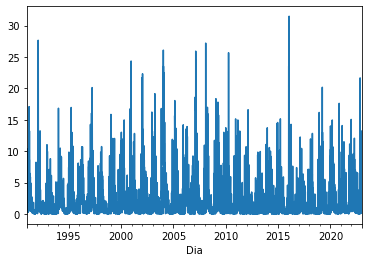

In [5]:
df['Chuva'].plot() # Outra possibilidade: df.Chuva.plot()

# Algumas transformações no DataFrame

## Compartimentalização (binning) - Histograma

Como saber qual é o máximo valor de bins a serem utilizados? Basta usar o **describe()**.

In [6]:
df.describe()

,Chuva
count,11687.000000
mean,1.942384
std,2.798179
min,0.000000
25%,0.260504
50%,0.857347
75%,2.442850
max,31.495855


In [7]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html

# Intervalos de interesse em mm/dia.
bins1 = [0, 2.5, 7.6, 15, 30, 50, 75, 100]

# Cria o histograma.
chuva1 = pd.cut(
    df['Chuva'], 
    bins1
)

In [8]:
chuva1

Dia
1991-01-01    (0.0, 2.5]
1991-01-02    (0.0, 2.5]
1991-01-03    (0.0, 2.5]
1991-01-04    (0.0, 2.5]
1991-01-05    (0.0, 2.5]
                 ...    
2022-12-27    (0.0, 2.5]
2022-12-28    (0.0, 2.5]
2022-12-29    (0.0, 2.5]
2022-12-30    (0.0, 2.5]
2022-12-31    (0.0, 2.5]
Name: Chuva, Length: 11688, dtype: category
Categories (7, interval[float64, right]): [(0.0, 2.5] < (2.5, 7.6] < (7.6, 15.0] < (15.0, 30.0] < (30.0, 50.0] < (50.0, 75.0] < (75.0, 100.0]]

Contagem das categorias

In [9]:
pd.value_counts(chuva1)

Chuva
(0.0, 2.5]       8809
(2.5, 7.6]       2268
(7.6, 15.0]       513
(15.0, 30.0]       68
(30.0, 50.0]        1
(50.0, 75.0]        0
(75.0, 100.0]       0
Name: count, dtype: int64

Plot do histograma com suas classes.

<AxesSubplot:xlabel='Chuva'>

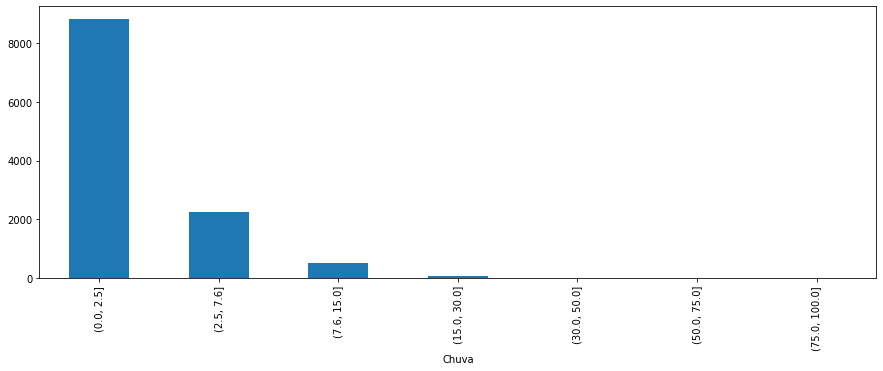

In [10]:
pd.value_counts(chuva1).plot.bar(figsize=(15,5))

Cria a coluna **bin** e adiciona os intervalos do histograma no DataFrame.

In [11]:
# Cria a coluna 'bin' no DataFrame 'df1' que receberá os valores de 'chuva1'.
df['bin'] = chuva1

df

,Chuva,bin
Dia,,
1991-01-01,1.083005,"(0.0, 2.5]"
1991-01-02,1.132334,"(0.0, 2.5]"
1991-01-03,1.101605,"(0.0, 2.5]"
1991-01-04,1.662441,"(0.0, 2.5]"
1991-01-05,1.765939,"(0.0, 2.5]"
...,...,...
2022-12-27,0.583862,"(0.0, 2.5]"
2022-12-28,0.579153,"(0.0, 2.5]"
2022-12-29,1.396807,"(0.0, 2.5]"


Adicionando rótulos (nomes) nas classes do histograma.

In [12]:
# Bins.
bins2 = [0, 2.5, 7.6, 15, 30, 50, 75, 100]

# Observação: A quantidade de rótulos (classificacao) tem que ser uma unidade menor que a 
# quantidade de classes (bins2).
# Exemplo: são utilizados 8 bins, logo a quantidade de rótulos deverá ser de 8-1=7 rótulos.

# Rótulos.
classificacao = [
    'Muito Fraca', 
    'Fraca', 
    'Moderada', 
    'Moderadamente Forte', 
    'Forte', 
    'Muito Forte', 
    'Extremamente Forte'
]

# Cria o histograma.
chuva2 = pd.cut(
    df['Chuva'], 
    bins2, 
    labels=classificacao
)

chuva2

Dia
1991-01-01    Muito Fraca
1991-01-02    Muito Fraca
1991-01-03    Muito Fraca
1991-01-04    Muito Fraca
1991-01-05    Muito Fraca
                 ...     
2022-12-27    Muito Fraca
2022-12-28    Muito Fraca
2022-12-29    Muito Fraca
2022-12-30    Muito Fraca
2022-12-31    Muito Fraca
Name: Chuva, Length: 11688, dtype: category
Categories (7, object): ['Muito Fraca' < 'Fraca' < 'Moderada' < 'Moderadamente Forte' < 'Forte' < 'Muito Forte' < 'Extremamente Forte']

Contabiliza a quantidade de valores para cada rótulo (classificacao).

In [13]:
pd.value_counts(chuva2)

Chuva
Muito Fraca            8809
Fraca                  2268
Moderada                513
Moderadamente Forte      68
Forte                     1
Muito Forte               0
Extremamente Forte        0
Name: count, dtype: int64

Plot básico do histograma com rótulos.

<AxesSubplot:xlabel='Chuva'>

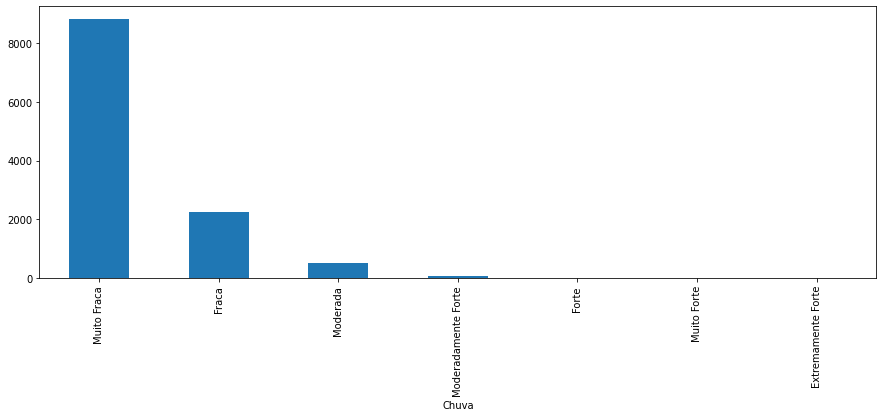

In [14]:
pd.value_counts(chuva2).plot.bar(figsize=(15,5))

In [15]:
# Cria a coluna 'Classificacao' no DataFrame 'df1' que recebe o valor da variável chuva2.
df['Classificacao'] = chuva2

In [16]:
df

,Chuva,bin,Classificacao
Dia,,,
1991-01-01,1.083005,"(0.0, 2.5]",Muito Fraca
1991-01-02,1.132334,"(0.0, 2.5]",Muito Fraca
1991-01-03,1.101605,"(0.0, 2.5]",Muito Fraca
1991-01-04,1.662441,"(0.0, 2.5]",Muito Fraca
1991-01-05,1.765939,"(0.0, 2.5]",Muito Fraca
...,...,...,...
2022-12-27,0.583862,"(0.0, 2.5]",Muito Fraca
2022-12-28,0.579153,"(0.0, 2.5]",Muito Fraca
2022-12-29,1.396807,"(0.0, 2.5]",Muito Fraca


In [17]:
# Remove a coluna 'bin' do DataFrame.
df.drop(columns=['bin', 'Classificacao'], inplace=True)

In [18]:
df

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807
